# **Data Science Project: Time Series Forecasting of the Rogers Stock (RCI.B)**


---

What is Time-Series Analysis:
- Analysis of recorded data points at consistent intervals over a set period of time

Rogers Communications:
- Canadian communications and media company
- Providing wireless services, cable television, home phone and Internet
- Significant assets include: Blue Jays, Sportsnet

Data available through yahoo finance: https://ca.finance.yahoo.com/quote/RCI-B.TO/history?p=RCI-B.TO

Data Period: January 2000 - June 2023

Data Fields:

1. **Date**
2. **Open:** The opening price is the price from the first transaction of a business day.
3. **High:** The highest price a security or asset has been traded at.
4. **Low:** The lowest price a security or asset has been traded at.
5. **Close:**
 The closing price is the last price anyone paid for a share of that stock on the given day.
6. **Adj.Close:** Adjusted close is the closing price after adjustments for all applicable splits and dividend distributions.
7. **Volume:** Volume is the number of shares traded during the given day.

Machine Learning Models explored:

---


1. Prophet
2. Autoregressive integrated moving average (ARIMA)

Next Steps:
1. Long Short Term Memory Network (LSTM)
2. Coupling each model with sentiment analysis

In [291]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error
from pandas.plotting import lag_plot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import datetime as dt


#!pip install prophet
from prophet import Prophet
from prophet.plot import plot_plotly

%matplotlib inline

In [292]:
# Data is for period: Jan 2000 - June 2023
file_path = '/content/drive/MyDrive/DataScience3/Project/RCI-B-TO-Jan2000-Jun2023.csv'
df_source = pd.read_csv(file_path)
df = df_source.copy()

In [293]:
# Show first 10 records of the dataset
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-31,21.450001,22.100000,21.125000,21.900000,12.432207,663000.0
1,2000-02-01,22.100000,22.450001,21.799999,22.250000,12.630899,2066000.0
2,2000-02-02,22.450001,23.475000,22.375000,23.375000,13.269538,2985800.0
3,2000-02-03,23.549999,24.225000,23.549999,23.924999,13.581762,4600200.0
4,2000-02-04,24.250000,24.900000,23.725000,24.100000,13.681104,1845400.0
5,2000-02-07,24.100000,24.250000,21.900000,21.950001,12.460594,10271800.0
6,2000-02-08,22.250000,22.850000,20.400000,21.375000,12.134173,7854200.0
7,2000-02-09,21.750000,22.875000,21.750000,22.525000,12.787007,10306800.0
8,2000-02-10,22.525000,22.799999,21.500000,21.725000,12.332868,3589800.0
9,2000-02-11,21.625000,21.725000,20.950001,21.275000,12.077408,2671200.0


In [294]:
# shape will tell us the size of our table in the form --> (rows,columns)
df.shape

(5910, 7)

In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5910 entries, 0 to 5909
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5910 non-null   object 
 1   Open       5864 non-null   float64
 2   High       5864 non-null   float64
 3   Low        5864 non-null   float64
 4   Close      5864 non-null   float64
 5   Adj Close  5864 non-null   float64
 6   Volume     5864 non-null   float64
dtypes: float64(6), object(1)
memory usage: 323.3+ KB


In [296]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5864.000000,5864.000000,5864.000000,5864.000000,5864.000000,5.864000e+03
mean,39.408371,39.776765,39.028677,39.403710,30.319160,1.462450e+06
std,18.971253,19.080170,18.862096,18.971767,19.113474,1.164923e+06
min,4.330000,4.390000,4.270000,4.315000,2.453322,2.060000e+04
25%,22.717499,22.990001,22.504999,22.746250,13.042580,7.605750e+05
50%,40.389999,40.674999,40.095001,40.385000,25.829691,1.129900e+06
75%,56.245001,56.710001,55.710001,56.217500,49.662078,1.773325e+06
max,76.300003,80.849998,75.120003,76.070000,73.589439,1.817510e+07


In [297]:
# Convert "Date" field from type Object to Datetime
df["Date"] = pd.to_datetime(df["Date"])
print(type(df["Date"]))
df.info()

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5910 entries, 0 to 5909
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5910 non-null   datetime64[ns]
 1   Open       5864 non-null   float64       
 2   High       5864 non-null   float64       
 3   Low        5864 non-null   float64       
 4   Close      5864 non-null   float64       
 5   Adj Close  5864 non-null   float64       
 6   Volume     5864 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 323.3 KB


Text(0, 0.5, 'Opening Price (CAD)')

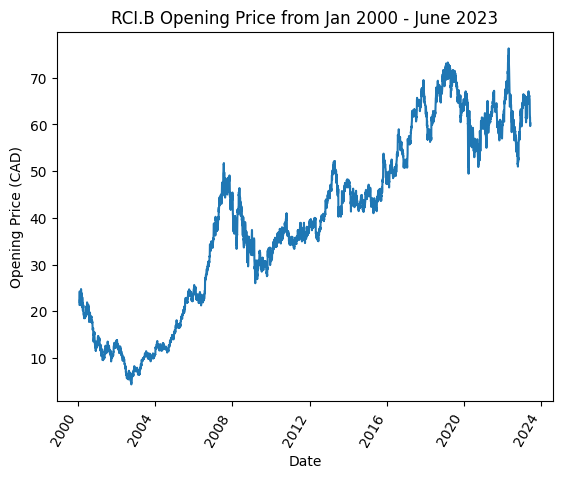

In [298]:
# Plot each variable (i.e. Open, High, Low, Close, Adj Close, Volume) over Time

# Plotting Opening value over Time
plt.plot(df['Date'],df['Open'])
plt.title('RCI.B Opening Price from Jan 2000 - June 2023')
plt.xticks(rotation=60, ha='right')
plt.xlabel('Date')
plt.ylabel('Opening Price (CAD)')


Text(0, 0.5, 'High Price (CAD)')

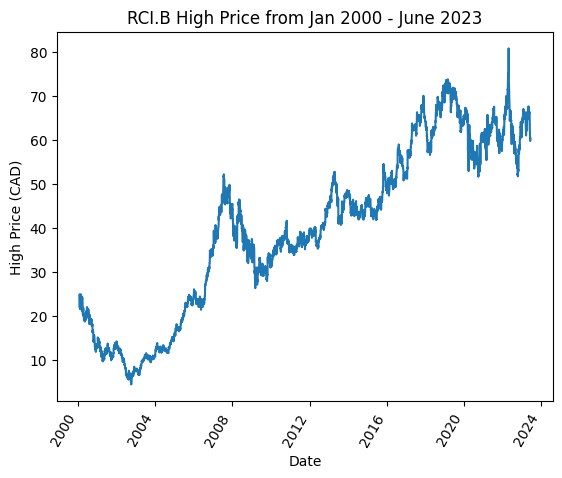

In [299]:
# Plotting High value over Time
plt.plot(df['Date'],df['High'])
plt.title('RCI.B High Price from Jan 2000 - June 2023')
plt.xticks(rotation=60, ha='right')
plt.xlabel('Date')
plt.ylabel('High Price (CAD)')

Text(0, 0.5, 'Closing Price (CAD)')

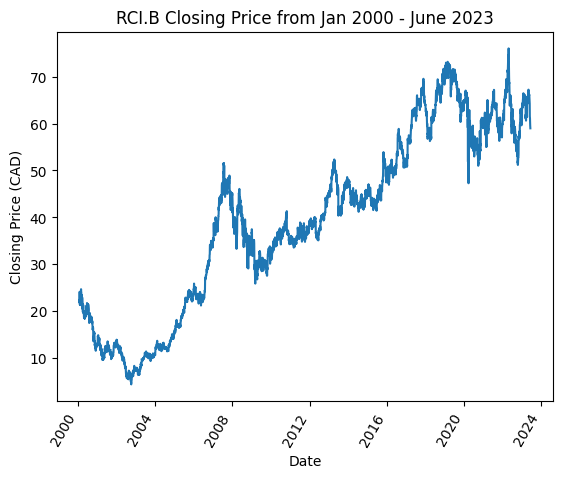

In [300]:
# Plotting Closing value over Time
plt.plot(df['Date'],df['Close'])
plt.title('RCI.B Closing Price from Jan 2000 - June 2023')
plt.xticks(rotation=60, ha='right')
plt.xlabel('Date')
plt.ylabel('Closing Price (CAD)')

Text(0, 0.5, 'Low Price (CAD)')

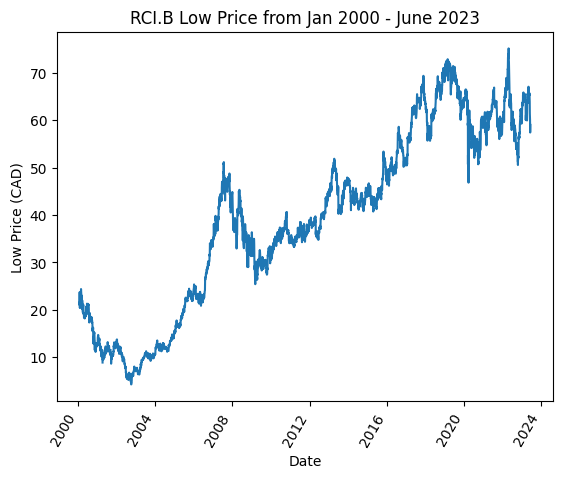

In [301]:
# Plotting Low value over Time
plt.plot(df['Date'],df['Low'])
plt.title('RCI.B Low Price from Jan 2000 - June 2023')
plt.xticks(rotation=60, ha='right')
plt.xlabel('Date')
plt.ylabel('Low Price (CAD)')

Text(0, 0.5, 'Volume')

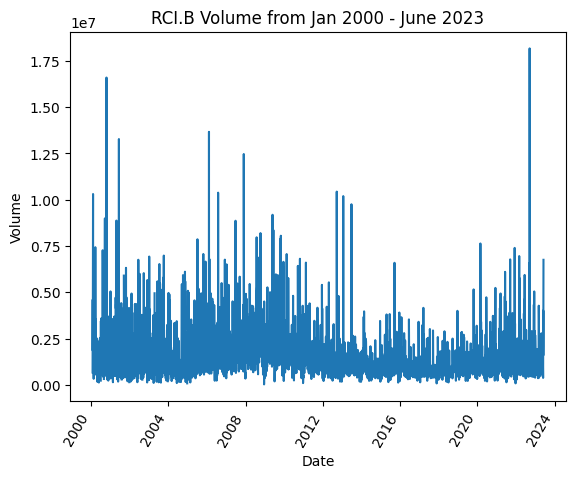

In [302]:
# Plotting Volume over Time
plt.plot(df['Date'],df['Volume'])
plt.title('RCI.B Volume from Jan 2000 - June 2023')
plt.xticks(rotation=60, ha='right')
plt.xlabel('Date')
plt.ylabel('Volume')

In [303]:
# Average values for Close per year
df.groupby(pd.PeriodIndex(df['Date'], freq="Y"))['Close'].mean()

Date
2000    18.559267
2001    11.845100
2002     8.584444
2003     9.455317
2004    12.741719
2005    20.177610
2006    26.443645
2007    43.398254
2008    37.840238
2009    30.720279
2010    35.861275
2011    36.191200
2012    39.486534
2013    46.240956
2014    44.043785
2015    45.712590
2016    52.029084
2017    61.927800
2018    63.859243
2019    68.283346
2020    58.226270
2021    60.940638
2022    61.942080
2023    64.324486
Freq: A-DEC, Name: Close, dtype: float64

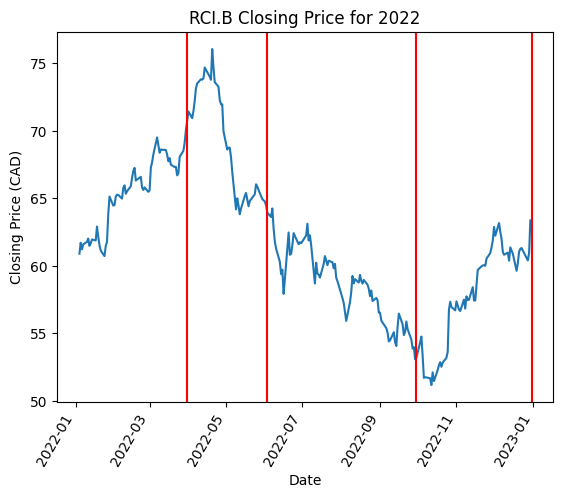

In [304]:
# Plotting Closing value over Time for 2022
df_2022 = df[(df['Date']>= '2022-01-01') & (df['Date'] < '2023-01-01')]
df_2022.tail()

plt.plot(df_2022['Date'],df_2022['Close'])
plt.title('RCI.B Closing Price for 2022')
plt.xticks(rotation=60, ha='right')
plt.xlabel('Date')
plt.ylabel('Closing Price (CAD)')
plt.axvline(dt.datetime(2022, 3, 31), color='red')
plt.axvline(dt.datetime(2022, 6, 3), color='red')
plt.axvline(dt.datetime(2022, 9, 30), color='red')
plt.axvline(dt.datetime(2022, 12, 31), color='red')


**Data Analysis Conclusions:**
- General upward/positive trend over time


Target Field will be Closing value of the RCI.B Stock

# **Creating a Predition Model Using Prophet:**


---
Background:
- Prophet is an open source SW released by Facebook's Data Science team
- Prophet is a procedure for forecasting univariate (single) time series data based on an additive model where non-linear trends are fit with yearly, weekly and daily seasonality plus holiday effects (by decomposing the time series into pieces)
- Prophet works good with large historical datasets that have strong seasonality patterns
- We don't need to do much pre-processing of the data. Prophets can work with missing data that has outliers
- We can incorporate domain knowledge (i.e. we can tweak forecast to specify specific dates that we expect change)



In [305]:
df_prophet = df_source.copy()

In [306]:
df_prophet.drop(['Open','High','Low', 'Adj Close', 'Volume'],axis=1,inplace=True)

In [307]:
# Prophet imposes the strict condition that the input columns must be named as ds (the time column) and y (the metric column)
# Re-assign columns appropriately
df_prophet['Date'] = pd.to_datetime(df_prophet['Date'])
df_prophet = df_prophet.rename(columns={'Date': 'ds','Close': 'y', })
df_prophet.set_index('ds')
df_prophet.tail()


,ds,y
5905,2023-05-30,60.360001
5906,2023-05-31,59.849998
5907,2023-06-01,59.880001
5908,2023-06-02,59.610001
5909,2023-06-05,59.000000


In [308]:
# Create a Train and Test Data Set
train = df_prophet.loc[df_prophet['ds'] < '2023-05-01']
test = df_prophet.loc[df_prophet['ds'] >= '2023-05-01']
train.tail()

,ds,y
5880,2023-04-24,64.410004
5881,2023-04-25,64.639999
5882,2023-04-26,66.370003
5883,2023-04-27,66.760002
5884,2023-04-28,66.940002


In [309]:
# Training the Model
# 2 parameters: 1) interval_width is the confidence interval 2) daily_seasonality
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(train) # Fit the data (train) to the model

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_hwui5zf/ulk_yn6_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_hwui5zf/g_vo1m5a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80150', 'data', 'file=/tmp/tmp_hwui5zf/ulk_yn6_.json', 'init=/tmp/tmp_hwui5zf/g_vo1m5a.json', 'output', 'file=/tmp/tmp_hwui5zf/prophet_model9jta0nuh/prophet_model-20230613233847.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:38:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:39:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [310]:
# Forecasting
future = m.make_future_dataframe(periods=40, freq='D')
forecast = m.predict(future)

In [311]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
5920,2023-06-03,58.984609,53.353180,65.447966,58.888734,59.063196,0.434688,0.434688,0.434688,0.433864,0.433864,0.433864,-0.054233,-0.054233,-0.054233,0.055057,0.055057,0.055057,0.0,0.0,0.0,59.419296
5921,2023-06-04,58.980902,53.115215,65.167734,58.874082,59.065455,0.414673,0.414673,0.414673,0.433864,0.433864,0.433864,-0.054233,-0.054233,-0.054233,0.035042,0.035042,0.035042,0.0,0.0,0.0,59.395574
5922,2023-06-05,58.977194,53.547441,65.359339,58.858019,59.065318,0.473264,0.473264,0.473264,0.433864,0.433864,0.433864,0.027876,0.027876,0.027876,0.011524,0.011524,0.011524,0.0,0.0,0.0,59.450459
5923,2023-06-06,58.973487,53.685278,65.046326,58.846387,59.065486,0.433168,0.433168,0.433168,0.433864,0.433864,0.433864,0.014549,0.014549,0.014549,-0.015245,-0.015245,-0.015245,0.0,0.0,0.0,59.406656
5924,2023-06-07,58.969780,53.260574,65.326255,58.835044,59.065569,0.395894,0.395894,0.395894,0.433864,0.433864,0.433864,0.006982,0.006982,0.006982,-0.044952,-0.044952,-0.044952,0.0,0.0,0.0,59.365674


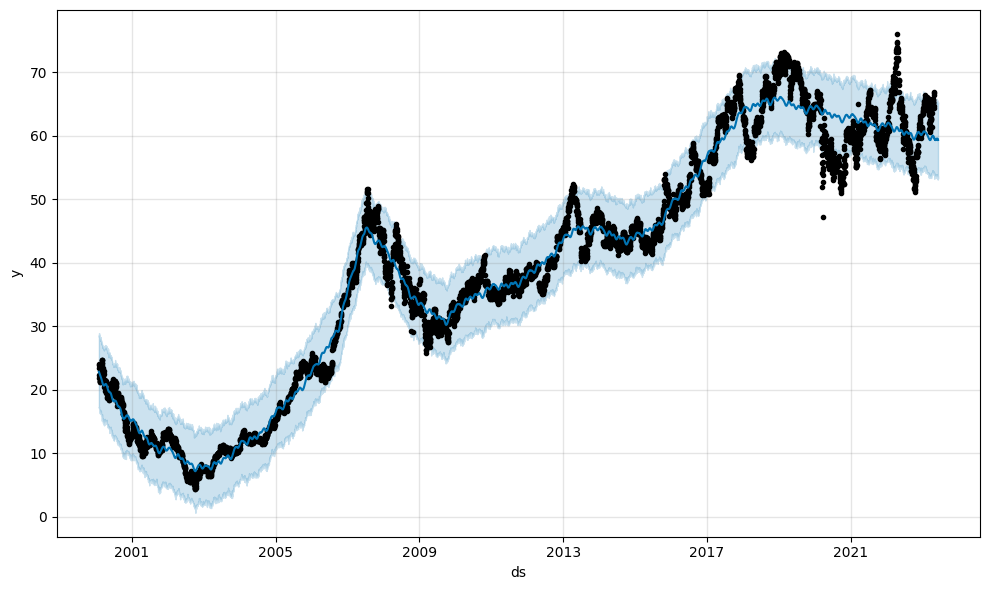

In [312]:
# Prophet provides the plot method
# Black dots: Observed values
# Blue line: Forecasted values
# Blue shaded region: uncertainty intervals of our forecast
plot_prediction = m.plot(forecast)

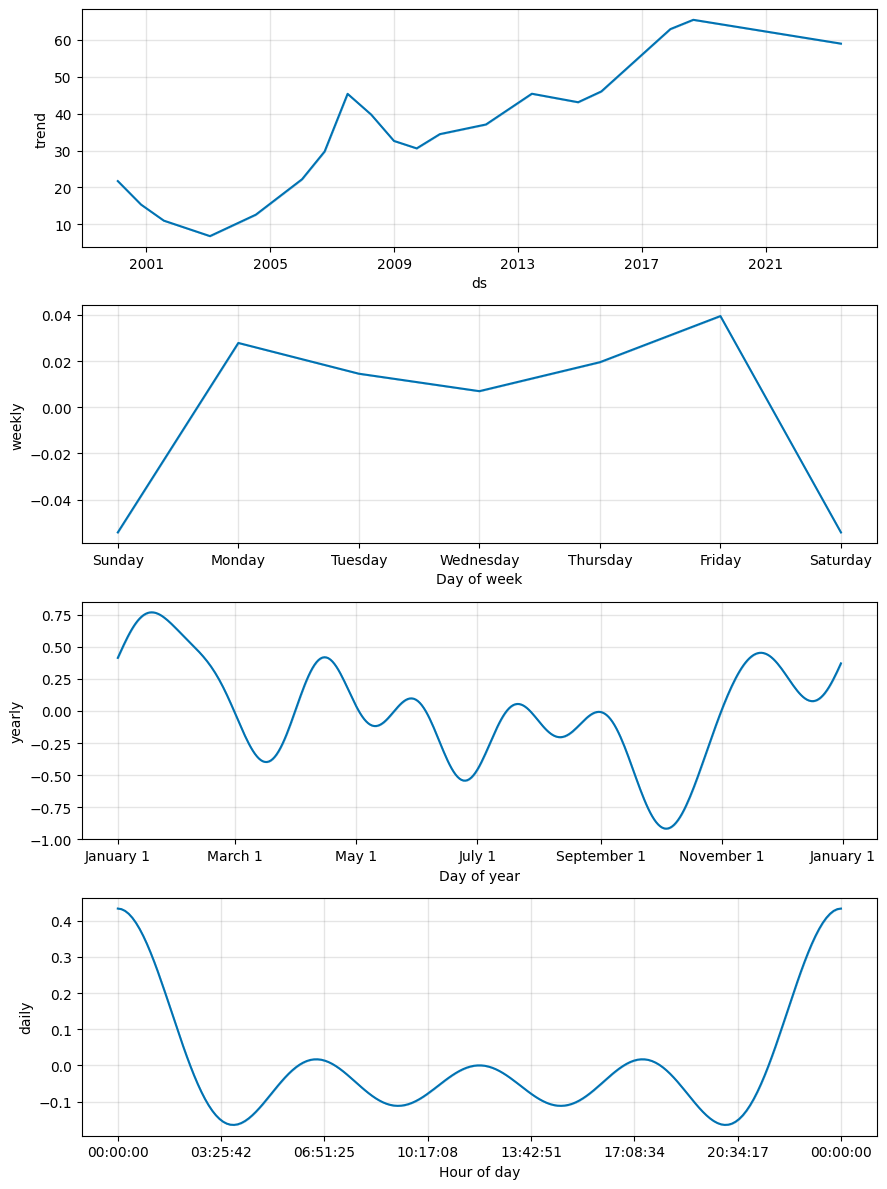

In [313]:
plot_breakdown = m.plot_components(forecast)

In [314]:
test.head()

,ds,y
5885,2023-05-01,67.260002
5886,2023-05-02,66.849998
5887,2023-05-03,66.320000
5888,2023-05-04,65.750000
5889,2023-05-05,65.889999


In [315]:
test

,ds,y
5885,2023-05-01,67.260002
5886,2023-05-02,66.849998
5887,2023-05-03,66.320000
5888,2023-05-04,65.750000
5889,2023-05-05,65.889999
5890,2023-05-08,66.120003
5891,2023-05-09,65.940002
5892,2023-05-10,66.180000
5893,2023-05-11,66.000000
5894,2023-05-12,66.139999


In [316]:
test.set_index('ds', inplace=True)

<Axes: xlabel='ds'>

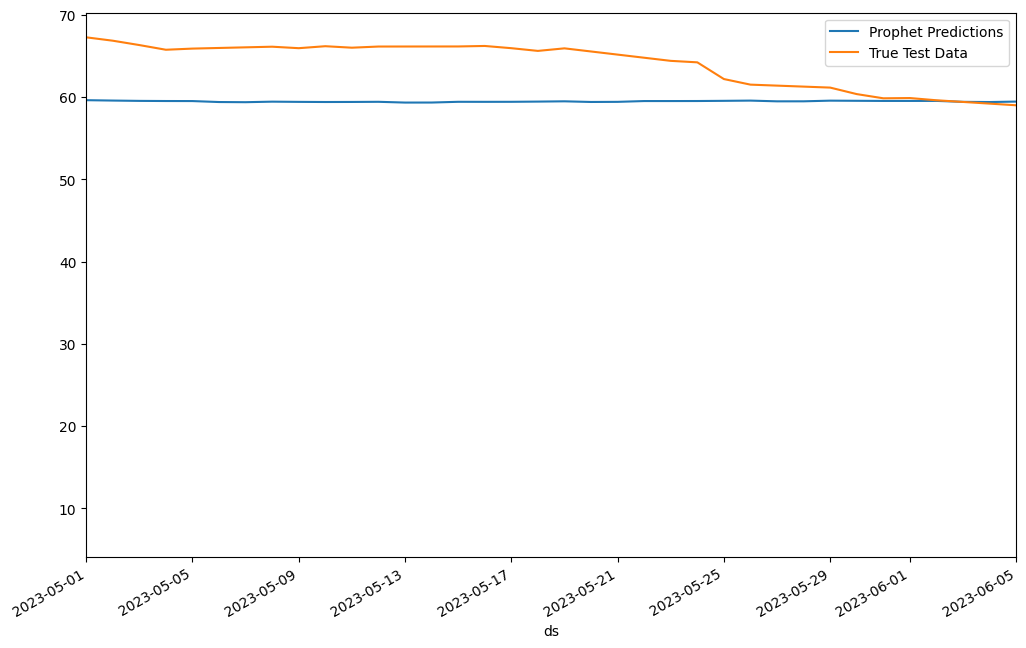

In [317]:
# Prophet Model Evaluation

# Plotting
ax=forecast.plot(x='ds',y='yhat',legend=True,label='Prophet Predictions',figsize=(12,8),xlim=('2023-05-01','2023-06-05'))
test['y'].plot(legend=True,label='True Test Data')




In [318]:
pred_prophet = forecast.loc[(forecast['ds']>='2023-05-01') & (forecast['ds']<='2023-06-05')]
pred_prophet_yhat = pred_prophet[['ds','yhat']]
pred_prophet_yhat.shape


(36, 2)

In [319]:
pred_prophet_yhat

,ds,yhat
5887,2023-05-01,59.621074
5888,2023-05-02,59.574193
5889,2023-05-03,59.535136
5890,2023-05-04,59.518650
5891,2023-05-05,59.512409
5892,2023-05-06,59.395497
5893,2023-05-07,59.375659
5894,2023-05-08,59.441406
5895,2023-05-09,59.415291
5896,2023-05-10,59.398535


In [320]:
test

,y
ds,
2023-05-01,67.260002
2023-05-02,66.849998
2023-05-03,66.320000
2023-05-04,65.750000
2023-05-05,65.889999
2023-05-08,66.120003
2023-05-09,65.940002
2023-05-10,66.180000
2023-05-11,66.000000


In [321]:
prophet_combined = pd.merge(test, pred_prophet_yhat, on='ds')

In [322]:
prophet_combined

,ds,y,yhat
0,2023-05-01,67.260002,59.621074
1,2023-05-02,66.849998,59.574193
2,2023-05-03,66.320000,59.535136
3,2023-05-04,65.750000,59.518650
4,2023-05-05,65.889999,59.512409
5,2023-05-08,66.120003,59.441406
6,2023-05-09,65.940002,59.415291
7,2023-05-10,66.180000,59.398535
8,2023-05-11,66.000000,59.405457
9,2023-05-12,66.139999,59.423277


In [323]:

rmse_prophet=sqrt(mean_squared_error(prophet_combined['yhat'],prophet_combined['y']))
test_mean_prophet = prophet_combined['y'].mean()
print("RMSE: {}".format(rmse_prophet))
print("Mean of Test Data: {}".format(test_mean_prophet))

RMSE: 5.411745301431939
Mean of Test Data: 64.17800032


In [324]:
test

,y
ds,
2023-05-01,67.260002
2023-05-02,66.849998
2023-05-03,66.320000
2023-05-04,65.750000
2023-05-05,65.889999
2023-05-08,66.120003
2023-05-09,65.940002
2023-05-10,66.180000
2023-05-11,66.000000


In [325]:
last_month = forecast.loc[(forecast['ds']>='2023-05-01') & (forecast['ds']<='2023-06-05')]
last_month = last_month[['ds','yhat']]
last_month

,ds,yhat
5887,2023-05-01,59.621074
5888,2023-05-02,59.574193
5889,2023-05-03,59.535136
5890,2023-05-04,59.518650
5891,2023-05-05,59.512409
5892,2023-05-06,59.395497
5893,2023-05-07,59.375659
5894,2023-05-08,59.441406
5895,2023-05-09,59.415291
5896,2023-05-10,59.398535


# **Creating a Predition Model Using AutoRegressive Integrated Moving Average (ARIMA):**


---
Background:
-  AR (autoregression - uses past values to make future predictions)
- MA (moving average - uses past errors to make future predictions)
- Integrated mens differencing. If data is non-stationary (has an increasing or decreasing trend) then we eliminate the trend by diferencing
- ARIMA takes 3 parameters -> ARIMA(p,d,q)
from pmdarima import auto_arima # auto arima will try different combinations of (p,d,q) and will assign an AIC score. goal is to minimize the AIC


In [326]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [327]:
df_arima = df_source.copy()
df_arima['Date'] = pd.to_datetime(df_arima['Date'])
df_arima.drop(['Open','High','Low', 'Adj Close', 'Volume'],axis=1,inplace=True)
df_arima=df_arima.dropna()
df_arima.head(5)

,Date,Close
0,2000-01-31,21.900000
1,2000-02-01,22.250000
2,2000-02-02,23.375000
3,2000-02-03,23.924999
4,2000-02-04,24.100000


In [328]:
# Check for Stationarity
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df_arima['Close'],autolag='AIC')
print('p-value {}'.format(dftest[1]))
# Data set is non-staionary

p-value 0.7841727666670827


In [329]:
# Using the ARIMA model
import warnings
warnings.filterwarnings("ignore")

In [330]:
stepwise_fit = auto_arima(df_arima['Close'], trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10850.758, Time=15.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10886.165, Time=1.40 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10866.965, Time=0.70 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10864.959, Time=1.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10884.792, Time=0.27 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=10859.031, Time=6.22 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=10858.927, Time=12.66 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=10844.294, Time=14.50 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=10860.412, Time=5.21 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=10842.056, Time=20.99 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=10861.312, Time=4.99 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=10844.651, Time=17.67 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=10813.097, Time=21.73 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=10854.671, Time=15.85 sec
 ARIMA(5,1,3

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5864
Model:               SARIMAX(4, 1, 3)   Log Likelihood               -5397.864
Date:                Tue, 13 Jun 2023   AIC                          10811.728
Time:                        23:45:20   BIC                          10865.140
Sample:                             0   HQIC                         10830.298
                               - 5864                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.9724      0.064    -30.854      0.000      -2.098      -1.847
ar.L2         -1.5567      0.115    -13.485      0.000      -1.783      -1.330
ar.L3         -0.5416      0.066     -8.187      0.000      -0.671      -0.412
ar.L4         -0.1064      0.008    -13.427      0.000      -0.122      -0.091
ma.L1          1.9166      0.065     29.282      0.000       1.788       2.045
ma.L2          1.3963      0.117     11.961      0.000       1.167       1.625
ma.L3          0.3451      0.065      5.312      0.000       0.218       0.472
sigma2         0.3700      0.003    139.392      0.000       0.365       0.375
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             72755.62
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               4.22   Skew:                            -0.47
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [331]:
from statsmodels.tsa.arima.model import ARIMA

In [332]:
# Create a Train and Test Data Set
train = df_arima.loc[df_arima['Date'] < '2023-05-01']
test = df_arima.loc[df_arima['Date'] >= '2023-05-01']
print(train.shape, test.shape)

(5839, 2) (25, 2)


In [333]:
model=ARIMA(train['Close'],order=(4,1,3))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 5839
Model:                 ARIMA(4, 1, 3)   Log Likelihood               -5372.979
Date:                Tue, 13 Jun 2023   AIC                          10761.957
Time:                        23:45:36   BIC                          10815.335
Sample:                             0   HQIC                         10780.519
                               - 5839                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.9709      0.065    -30.495      0.000      -2.098      -1.844
ar.L2         -1.5466      0.117    -13.169      0.000      -1.777      -1.316
ar.L3         -0.5359      0.067     -7.997      0.000      -0.667      -0.405
ar.L4         -0.1072      0.008    -13.376      0.000      -0.123      -0.092
ma.L1          1.9130      0.066     28.939      0.000       1.783       2.043
ma.L2          1.3813      0.118     11.664      0.000       1.149       1.613
ma.L3          0.3363      0.065      5.153      0.000       0.208       0.464
sigma2         0.3689      0.003    139.609      0.000       0.364       0.374
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             72507.48
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               4.25   Skew:                            -0.47
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [334]:
# Plot the original series and the forecasted series
from datetime import datetime
#print(test)
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start, end=end,typ='levels')
pred.index=df_arima['Date'][start:end+1]
print(pred)


Date
2023-05-01    66.864907
2023-05-02    66.926658
2023-05-03    66.886558
2023-05-04    66.891031
2023-05-05    66.919192
2023-05-08    66.871639
2023-05-09    66.923713
2023-05-10    66.879052
2023-05-11    66.909004
2023-05-12    66.896235
2023-05-15    66.893429
2023-05-16    66.907444
2023-05-17    66.887792
2023-05-18    66.907723
2023-05-19    66.891624
2023-05-23    66.901558
2023-05-24    66.898303
2023-05-25    66.895845
2023-05-26    66.902126
2023-05-29    66.894227
2023-05-30    66.901748
2023-05-31    66.896039
2023-06-01    66.899219
2023-06-02    66.898597
2023-06-05    66.897158
Name: predicted_mean, dtype: float64


In [335]:
test.set_index('Date', inplace=True)

<Axes: xlabel='Date'>

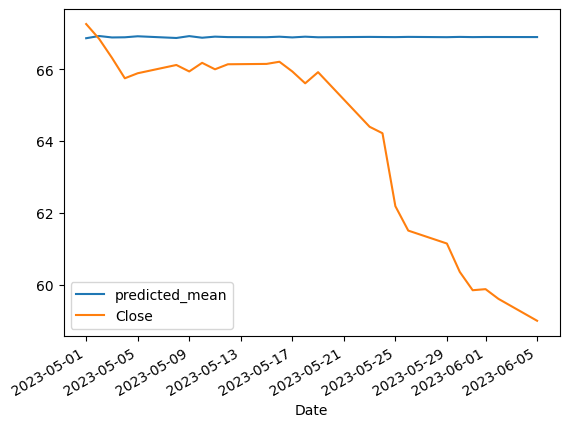

In [336]:
pred.plot(legend=True)
test['Close'].plot(legend=True)


In [337]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse=sqrt(mean_squared_error(pred,test['Close']))
test_mean = test['Close'].mean()
print("RMSE: {}".format(rmse))
print("Mean of Test Data: {}".format(test_mean))


RMSE: 3.8245300532300592
Mean of Test Data: 64.17800032


Prophet vs ARIMA Comparison:


 Model  | RMSE | Average Mean
 -------------------|------------------|------------------
 Prophet       | 5.411 | 64.178
 ARIMA       | 3.824 | 64.178